# Dominant Color testing

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [115]:
from matplotlib import image as img
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans

def get_dominant_color(id):
    image = img.imread('../Data/Images/' + str(id) + '.jpg')
    flat_img = whiten(np.reshape(image, (image.shape[0]*image.shape[1], image.shape[2])))
    cluster_centers, distortion = kmeans(temp_w, 5)
    return cluster_centers
    

In [106]:
get_dominant_color(100)

array([[0.13657507, 0.11040944, 0.15346113],
       [2.5032609 , 2.26161413, 2.36945169],
       [2.10877353, 1.84038423, 1.93271979],
       [1.30578774, 1.02490226, 1.10870853],
       [1.6904183 , 0.11426   , 0.40703952]])

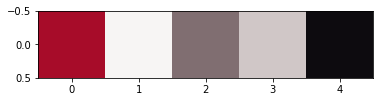

In [114]:
colors = []
r_std, g_std, b_std = df[['red', 'green', 'blue']].std()
for cluster_center in get_dominant_color(19):
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((
    scaled_r * r_std / 255,
    scaled_g * g_std / 255,
    scaled_b * b_std / 255
    ))
plt.imshow([colors])
plt.show()

In [ ]:
array([[2.5032609 , 2.26161413, 2.36945169],
       [0.13657507, 0.11040944, 0.15346113],
       [1.6904183 , 0.11426   , 0.40703952],
       [1.30578774, 1.02490226, 1.10870853],
       [2.10877353, 1.84038423, 1.93271979]])

In [28]:
from matplotlib import image as img
image = img.imread('../Data/Images/100.jpg')
image.shape

(750, 500, 3)

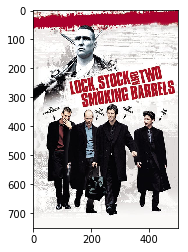

In [83]:

plt.imshow(image)
plt.show()

In [30]:
r = []
g = []
b = []
for line in image:
    for pixel in line:
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

In [32]:
df = pd.DataFrame({'red': r,
'blue': b,
'green': g})

In [47]:
750 * 500

375000

In [33]:
from scipy.cluster.vq import whiten
df['scaled_red'] = whiten(df['red'])
df['scaled_blue'] = whiten(df['blue'])
df['scaled_green'] = whiten(df['green'])
df.sample(n = 10)

,red,blue,green,scaled_red,scaled_blue,scaled_green
259042,181,178,180,1.831316,1.725280,1.655052
59860,249,249,249,2.519324,2.413454,2.289488
38608,255,253,254,2.580030,2.452224,2.335462
240252,4,7,2,0.040471,0.067848,0.018389
137851,190,38,24,1.922376,0.368318,0.220674
206167,29,33,26,0.293415,0.319855,0.239063
283340,224,219,220,2.266380,2.122676,2.022841
178443,255,255,255,2.580030,2.471609,2.344657
102131,71,82,76,0.718361,0.794792,0.698800
220170,6,10,5,0.060707,0.096926,0.045974


In [34]:
from scipy.cluster.vq import kmeans
cluster_centers, distortion = kmeans(df[['scaled_red', 'scaled_green', 'scaled_blue']], 5)

In [35]:
print(cluster_centers)

[[1.68512531 0.12139898 0.41095291]
 [0.14093917 0.11458569 0.15792191]
 [2.15494017 1.88983373 1.98230291]
 [2.50988402 2.26907541 2.37742122]
 [1.38725676 1.10417527 1.19035514]]


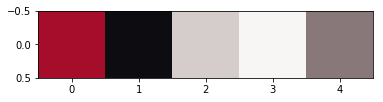

In [42]:
colors = []
r_std, g_std, b_std = df[['red', 'green', 'blue']].std()
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((
    scaled_r * r_std / 255,
    scaled_g * g_std / 255,
    scaled_b * b_std / 255
    ))
plt.imshow([colors])
plt.show()

In [102]:
def get_dominant_color_2(id):
    image = img.imread('../Data/Images/' + str(id) + '.jpg')
    flat_img = np.reshape(image, (image.shape[0]*image.shape[1], image.shape[2]))
    cluster_centers, distortion = kmeans(temp_w, 5)
    return cluster_centers
    
    

In [96]:
get_dominant_color(100)

array([[2.5032609 , 2.26161413, 2.36945169],
       [0.13657507, 0.11040944, 0.15346113],
       [1.6904183 , 0.11426   , 0.40703952],
       [1.30578774, 1.02490226, 1.10870853],
       [2.10877353, 1.84038423, 1.93271979]])

In [44]:
image

array([[[209, 213, 214],
        [207, 205, 208],
        [217, 208, 213],
        ...,
        [170,   0,  45],
        [170,   0,  45],
        [170,   0,  45]],

       [[242, 246, 245],
        [240, 240, 240],
        [248, 242, 246],
        ...,
        [170,   0,  45],
        [170,   0,  45],
        [170,   0,  45]],

       [[238, 243, 237],
        [237, 237, 235],
        [244, 243, 241],
        ...,
        [170,   0,  45],
        [170,   0,  45],
        [170,   0,  45]],

       ...,

       [[250, 249, 247],
        [250, 249, 247],
        [250, 249, 247],
        ...,
        [250, 249, 247],
        [250, 249, 247],
        [250, 249, 247]],

       [[250, 249, 247],
        [250, 249, 247],
        [250, 249, 247],
        ...,
        [250, 249, 247],
        [250, 249, 247],
        [250, 249, 247]],

       [[250, 249, 247],
        [250, 249, 247],
        [250, 249, 247],
        ...,
        [250, 249, 247],
        [250, 249, 247],
        [250, 249, 247]]

In [81]:
image[0][:5]

array([[209, 213, 214],
       [207, 205, 208],
       [217, 208, 213],
       [216, 203, 210],
       [218, 207, 213]], dtype=uint8)

In [82]:
image.flatten()[:15]

array([209, 213, 214, 207, 205, 208, 217, 208, 213, 216, 203, 210, 218,
       207, 213], dtype=uint8)

In [85]:
temp = np.reshape(image, (750 * 500, 3))

In [86]:
temp_w = whiten(temp)

In [77]:
temp

array([[209, 213, 214],
       [242, 246, 245],
       [238, 243, 237],
       ...,
       [250, 249, 247],
       [250, 249, 247],
       [250, 249, 247]], dtype=uint8)

In [88]:
temp_w

array([[2.11461318, 1.9584781 , 2.07421336],
       [2.09437764, 1.88492024, 2.01605785],
       [2.19555531, 1.91250443, 2.06452077],
       ...,
       [2.5294416 , 2.28948848, 2.39406869],
       [2.5294416 , 2.28948848, 2.39406869],
       [2.5294416 , 2.28948848, 2.39406869]])

In [89]:
from scipy.cluster.vq import kmeans

In [108]:
cluster_centers, distortion = kmeans(temp_w, 5)

In [91]:
cluster_centers


array([[0.13657507, 0.11040944, 0.15346113],
       [2.10877353, 1.84038423, 1.93271979],
       [2.5032609 , 2.26161413, 2.36945169],
       [1.6904183 , 0.11426   , 0.40703952],
       [1.30578774, 1.02490226, 1.10870853]])

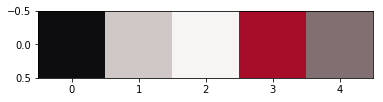

In [92]:
colors = []
r_std, g_std, b_std = df[['red', 'green', 'blue']].std()
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((
    scaled_r * r_std / 255,
    scaled_g * g_std / 255,
    scaled_b * b_std / 255
    ))
plt.imshow([colors])
plt.show(